In [2]:
!pip install tensorflow==1.8.0
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 49.1MB 76kB/s 
     |████████████████████████████████| 3.1MB 42.3MB/s 
     |████████████████████████████████| 890kB 38.1MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=dd7c20bf38e51e09318da9dcfba6e9204eda956cd07f11bc48335e80b487d290
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarning: Passing (type, 1) or 

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
tf.__version__

'1.8.0'

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
minist=input_data.read_data_sets("/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
minist.train.images.shape

(55000, 784)

In [22]:
def plt_img(num):
  plt.imshow(minist.train.images[num].reshape((28,28)),cmap="gray")
  print(minist.train.labels[num])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


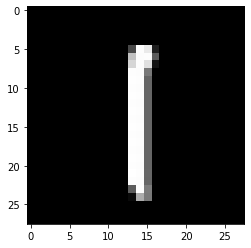

In [25]:
plt_img(89)

In [10]:
x=tf.placeholder(tf.float32,shape=([None,784]))
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [11]:
y=tf.nn.softmax(tf.matmul(x,W)+b)

In [12]:
y_a=tf.placeholder(tf.float32,shape=([None,10]))

In [13]:
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_a-tf.log(y),reduction_indices=[1]))

In [14]:
train_step=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cross_entropy)

In [15]:
sess=tf.InteractiveSession()

In [16]:
tf.global_variables_initializer().run()

In [17]:
for i in range(550):
  batch_x,batch_y=minist.train.next_batch(100)
  sess.run(train_step,feed_dict={x:batch_x,y_a:batch_y})